<a href="https://colab.research.google.com/github/karolmetzker/ProjetoML/blob/main/Dry_Bean_versaofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bibliotecas de manipualção e visualização de dados

#PROJETO MODELAGEM PREDITIVA E DESCRITIVA
# ALUNOS 
# Karollyne Metzker
# Raul Renner Martins de Sá
# José Eduardo Carara Jr 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from scipy.io.arff import loadarff 
from scipy.io import arff

#bibliotecas para aprendizagem de maquina
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Funções de avaliação dos modelos
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


LENDO O DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = loadarff('/content/drive/My Drive/Colab Notebooks/Dry_Bean_Dataset.arff')
df = pd.DataFrame(data[0])
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395.0    610.291       208.178117       173.888747      1.197191   
1      28734.0    638.018       200.524796       182.734419      1.097356   
2      29380.0    624.110       212.826130       175.931143      1.209713   
3      30008.0    645.884       210.557999       182.516516      1.153638   
4      30140.0    620.134       201.847882       190.279279      1.060798   
...        ...        ...              ...              ...           ...   
13606  42097.0    759.696       288.721612       185.944705      1.552728   
13607  42101.0    757.499       281.576392       190.713136      1.476439   
13608  42139.0    759.321       281.539928       191.187979      1.472582   
13609  42147.0    763.779       283.382636       190.275731      1.489326   
13610  42159.0    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1          0.411785     29172.0     191.272750  0.783968  0.984986   0.887034   
2          0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3          0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4          0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002     42508.0     231.515799  0.714574  0.990331   0.916603   
13607      0.735702     42494.0     231.526798  0.799943  0.990752   0.922015   
13608      0.734065     42569.0     231.631261  0.729932  0.989899   0.918424   
13609      0.741055     42667.0     231.653248  0.705389  0.987813   0.907906   
13610      0.786693     42600.0     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

             Class  
0         b'SEKER'  
1         b'SEKER'  
2         b'SEKER'  
3         b'SEKER'  
4         b'SEKER'  
...            ...  
13606  b'DERMASON'  
13607  b'DERMASON'  
13608  b'DERMASON'  
13609  b'DERMASON'  
13610  b'DERMASON'  

[13611 rows x 17 columns]

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
print("Quantas classes existem nesse dataset?\n%d" %(len(df["Class"].unique())))#retorna valores únicos baseados numa tabela de dispersão
print("\nQuantas instâncias existem no dataset?\n%d" %(len(df))) #tamanho
print("\nQuantas caracteristicas(colunas) existem no dataset?\n%d" %(df.shape[1]))#retorna as dimensoes do data set,(150x5) como add [1] retorna 5, segundo valor da tupla, [0] retornaria o 150
print("\nQue features são essas?\n%s" %(str([k for k in df.keys()])))#uma por uma do nome das colunas
print("\nQual o numero de instâncias por classe?")
print(df["Class"].value_counts())#conta os valores od maior para o menor. 
#value_counts(normalize=True) > retorna a frequencia relativa dividindo todos os valores pela soma
#value_counts(bins=x) divide em grupos de x-1 em x-1 valores;(float)
#.value_counts(dropna=False) can also see NaN index values. dropna=True== apaga os vazios

Quantas classes existem nesse dataset?
7

Quantas instâncias existem no dataset?
13611

Quantas caracteristicas(colunas) existem no dataset?
17

Que features são essas?
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

Qual o numero de instâncias por classe?
b'DERMASON'    3546
b'SIRA'        2636
b'SEKER'       2027
b'HOROZ'       1928
b'CALI'        1630
b'BARBUNYA'    1322
b'BOMBAY'       522
Name: Class, dtype: int64


In [ ]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272750  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.913358      0.007332      0.003147      0.834222      0.998724   
1     0.953861      0.006979      0.003564      0.909851      0.998430   
2     0.908774      0.007244      0.003048      0.825871      0.999066   
3     0.928329      0.007017      0.003215      0.861794      0.994199   
4     0.970516      0.006697      0.003665      0.941900      0.999166   

      Class  
0  b'SEKER'  
1  b'SEKER'  
2  b'SEKER'  
3  b'SEKER'  
4  b'SEKER'

ANÁLISE EXPLORATÓRIA DOS DADOS

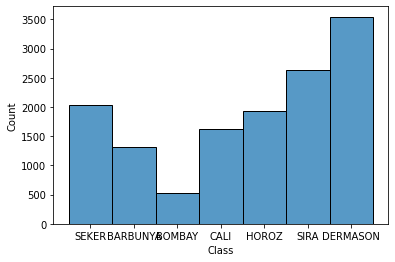

In [ ]:
# Ocorrência por classe
sns.histplot(data=df, x="Class")

In [ ]:
df.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623        -0.773609        -0.947204   
ShapeFactor2    -0.639291  -0.767592        -0.859238        -0.471347   
ShapeFactor3    -0.272145  -0.408435        -0.568185        -0.019326   
ShapeFactor4    -0.355721  -0.429310        -0.482527        -0.263749   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.241735      0.267481    0.999939       0.984968   
Perimeter            0.385276      0.391066    0.967689       0.991380   
MajorAxisLength      0.550335      0.541972    0.932607       0.961733   
MinorAxisLength     -0.009161      0.019574    0.951339       0.948539   
AspectRation         1.000000      0.924293    0.243301       0.303647   
Eccentricity         0.924293      1.000000    0.269255       0.318667   
ConvexArea           0.243301      0.269255    1.000000       0.985226   
EquivDiameter        0.303647      0.318667    0.985226       1.000000   
Extent              -0.370184     -0.319362    0.052564       0.028383   
Solidity            -0.267754     -0.297592   -0.206191      -0.231648   
roundness           -0.766979     -0.722272   -0.362083      -0.435945   
Compactness         -0.987687     -0.970313   -0.269922      -0.327650   
ShapeFactor1         0.024593      0.019920   -0.847950      -0.892741   
ShapeFactor2        -0.837841     -0.860141   -0.640862      -0.713069   
ShapeFactor3        -0.978592     -0.981058   -0.274024      -0.330389   
ShapeFactor4        -0.449264     -0.449354   -0.362049      -0.392512   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054345 -0.196585  -0.357530    -0.268067     -0.847958   
Perimeter       -0.021160 -0.303970  -0.547647    -0.406857     -0.864623   
MajorAxisLength -0.078062 -0.284302  -0.596358    -0.568377     -0.773609   
MinorAxisLength  0.145957 -0.155831  -0.210344    -0.015066     -0.947204   
AspectRation    -0.370184 -0.267754  -0.766979    -0.987687      0.024593   
Eccentricity    -0.319362 -0.297592  -0.722272    -0.970313      0.019920   
ConvexArea       0.052564 -0.206191  -0.362083    -0.269922     -0.847950   
EquivDiameter    0.028383 -0.231648  -0.435945    -0.327650     -0.892741   
Extent           1.000000  0.191389   0.344411     0.354212     -0.141616   
Solidity         0.191389  1.000000   0.607150     0.303766      0.153388   
roundness        0.344411  0.607150   1.000000     0.768086      0.230273   
Compactness      0.354212  0.303766   0.768086     1.000000     -0.009394   
ShapeFactor1    -0.141616  0.153388   0.230273    -0.009394      1.000000   
ShapeFactor2     0.237956  0.343559   0.782824     0.868939      0.469197   
ShapeFactor3     0.347624  0.307662   0.763126     0.998686     -0.008320   
ShapeFactor4     0.148502  0.702163   0.472149     0.484436      0.248619   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.639291     -0.272145     -0.355721  
Perimeter           -0.767592     -0.408435     -0.429310  
MajorAxisLeng

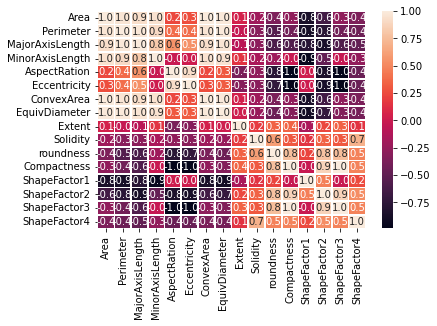

In [ ]:
#Analisando a correlação dos dados
correlation = df.corr()

# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

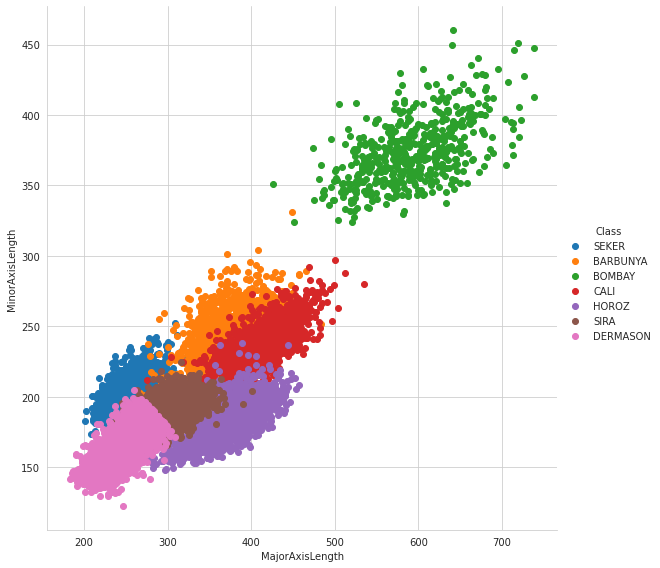

In [ ]:
# Distribuição das classes pelas features Maior e menor dimensões do eixo
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Class",
              height = 8).map(plt.scatter,
                              'MajorAxisLength',
                              'MinorAxisLength').add_legend()

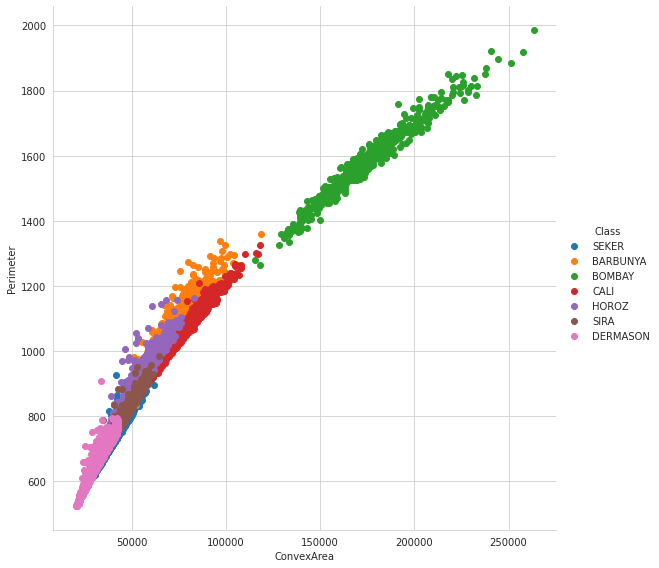

In [ ]:
# Distribuição das classes pelas features area convexa e perimetro
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Class",
              height = 8).map(plt.scatter,
                              'ConvexArea',
                              'Perimeter').add_legend()

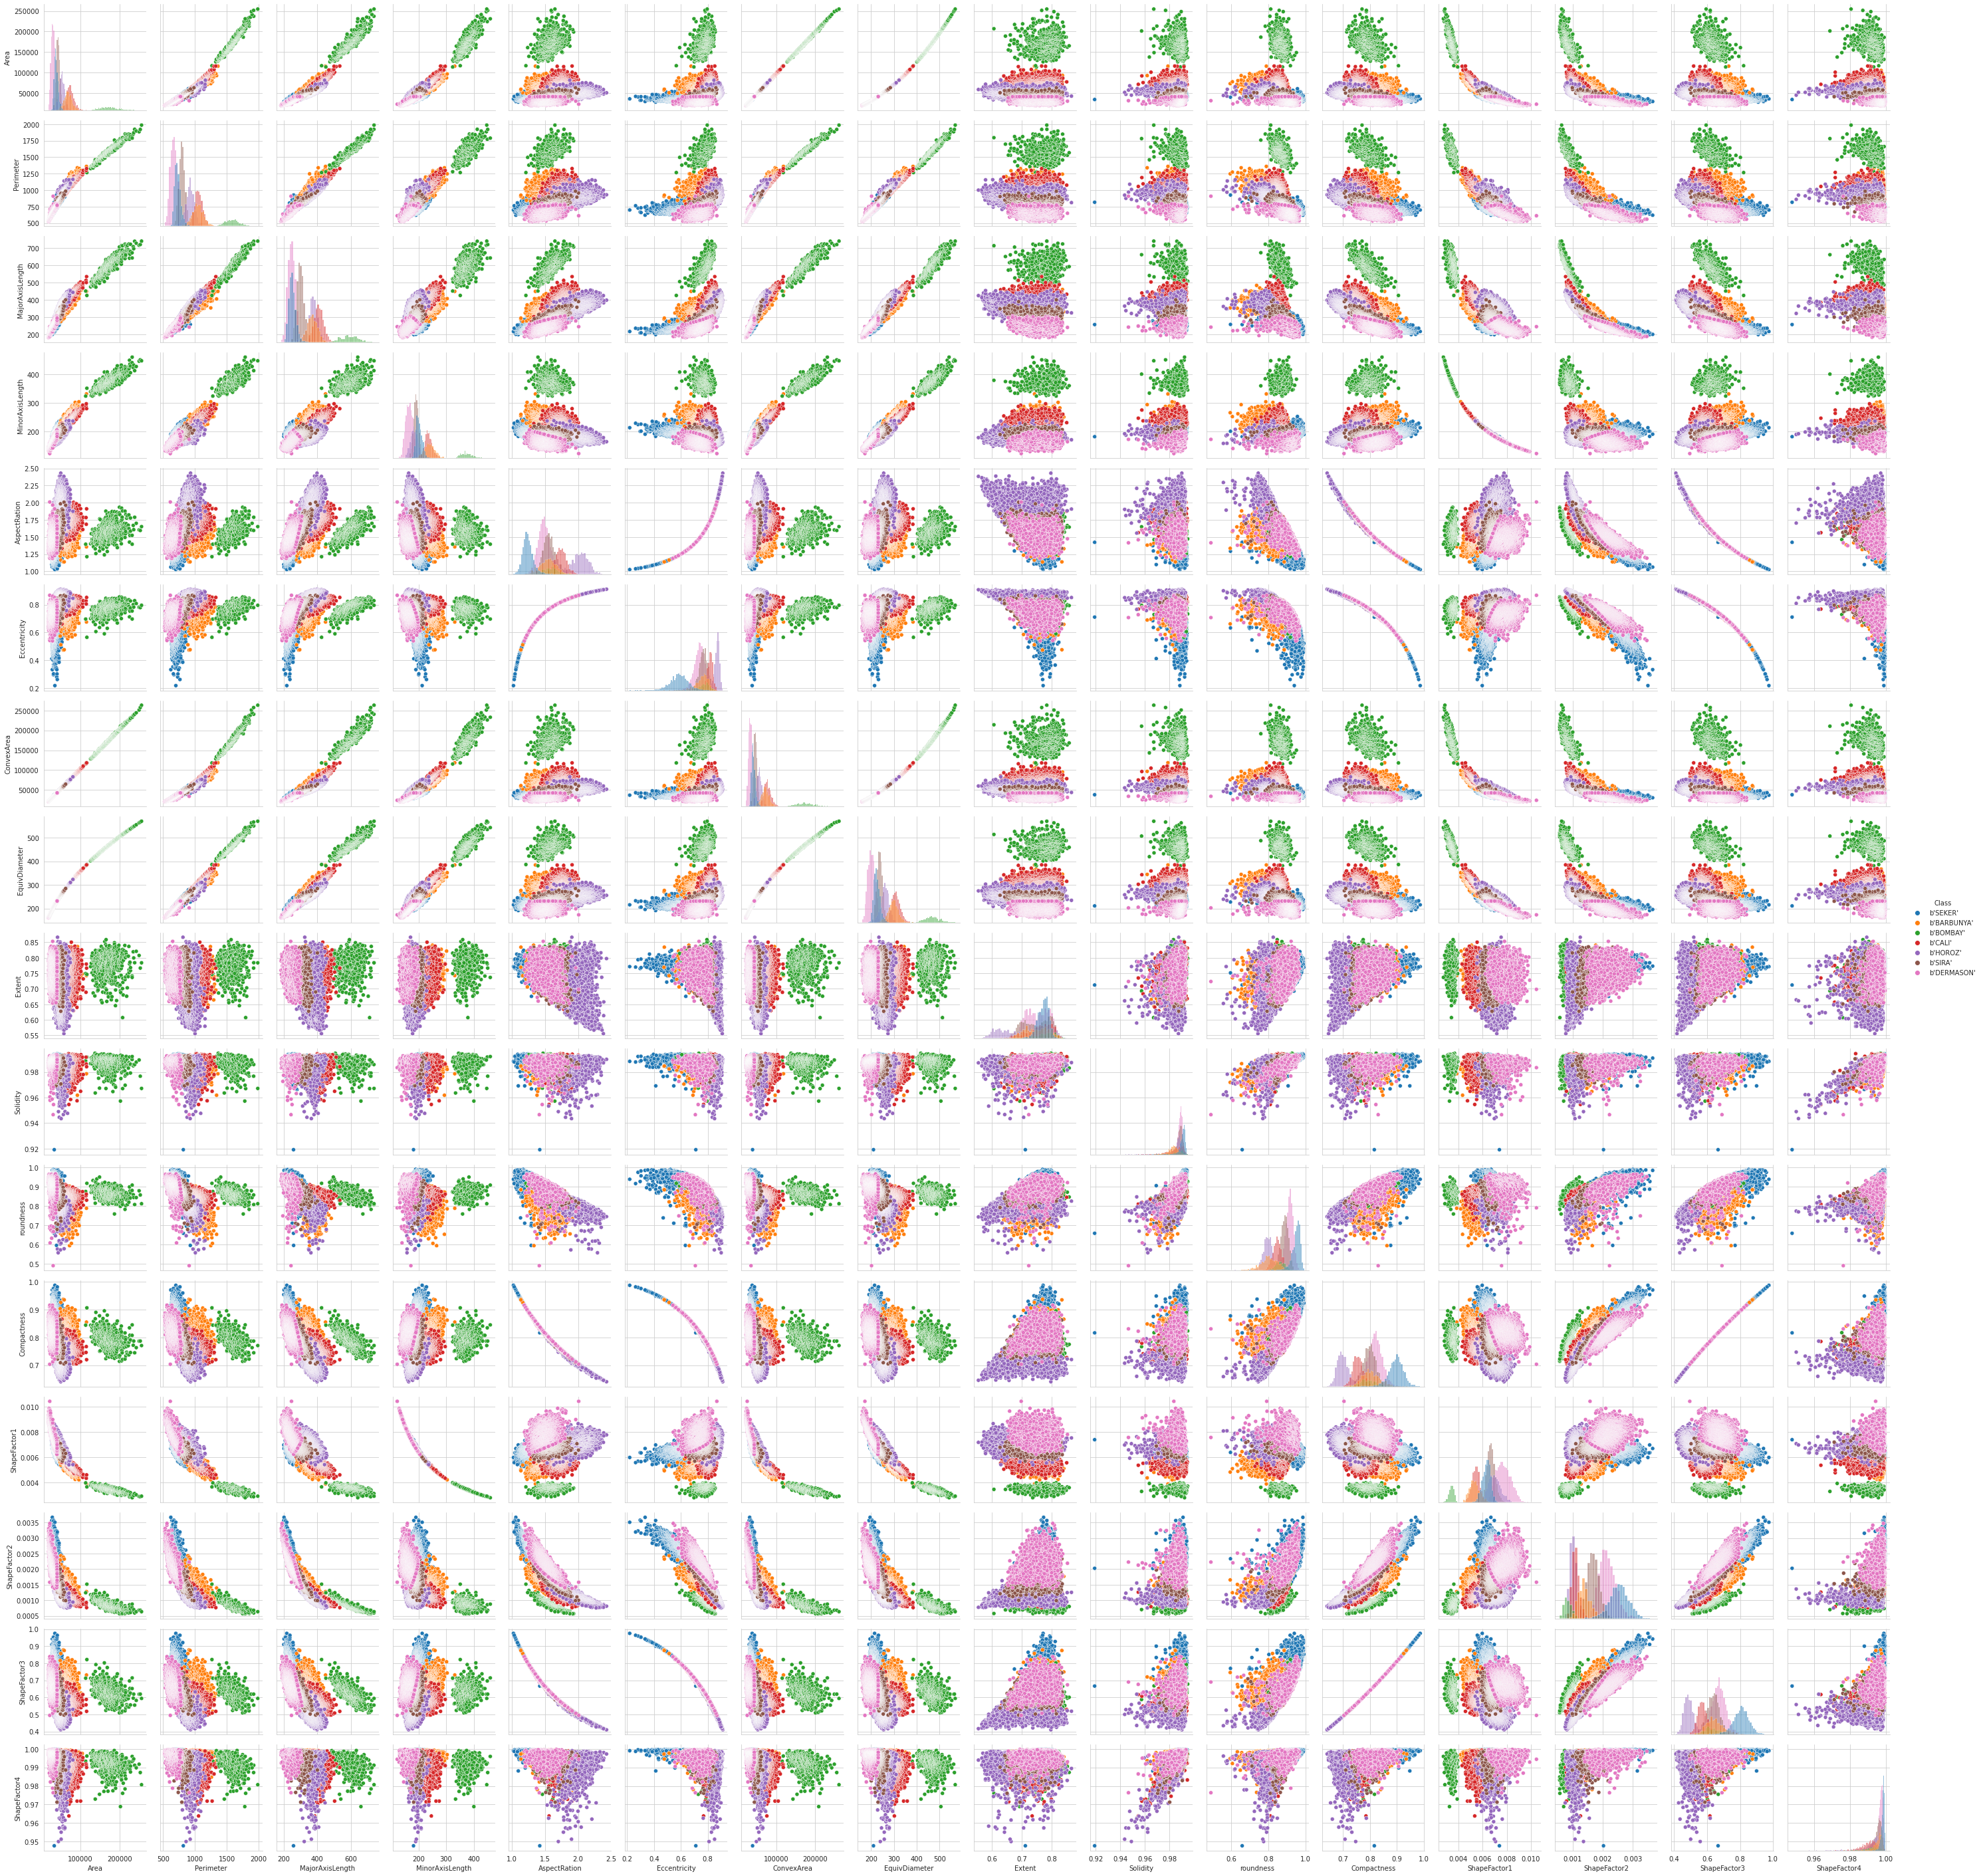

In [ ]:
#correção aos pares- plotagem
g = sns.PairGrid(df, hue="Class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [4]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
df['Class'] = pd.factorize(df['Class'])[0]
#3:0; 4:1, 5:2, 6:3, 7:4, 8:5, 9:6

# **SEPARAR EM CONJUNTO DE TREINO E TESTE**

In [16]:
from sklearn.model_selection import StratifiedKFold
X = df.iloc[:,0:16]
y = df.iloc[:,[16]]

skf = StratifiedKFold(n_splits=10, shuffle=True)

for train, test in skf.split(X, y):
  X_train, X_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]


In [17]:
X_train

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395.0    610.291       208.178117       173.888747      1.197191   
1      28734.0    638.018       200.524796       182.734419      1.097356   
2      29380.0    624.110       212.826130       175.931143      1.209713   
3      30008.0    645.884       210.557999       182.516516      1.153638   
4      30140.0    620.134       201.847882       190.279279      1.060798   
...        ...        ...              ...              ...           ...   
13605  42070.0    760.701       276.691651       193.945366      1.426647   
13606  42097.0    759.696       288.721612       185.944705      1.552728   
13607  42101.0    757.499       281.576392       190.713136      1.476439   
13609  42147.0    763.779       283.382636       190.275731      1.489326   
13610  42159.0    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1          0.411785     29172.0     191.272750  0.783968  0.984986   0.887034   
2          0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3          0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4          0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13605      0.713216     42458.0     231.441543  0.730813  0.990862   0.913596   
13606      0.765002     42508.0     231.515799  0.714574  0.990331   0.916603   
13607      0.735702     42494.0     231.526798  0.799943  0.990752   0.922015   
13609      0.741055     42667.0     231.653248  0.705389  0.987813   0.907906   
13610      0.786693     42600.0     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.913358      0.007332      0.003147      0.834222      0.998724  
1         0.953861      0.006979      0.003564      0.909851      0.998430  
2         0.908774      0.007244      0.003048      0.825871      0.999066  
3         0.928329      0.007017      0.003215      0.861794      0.994199  
4         0.970516      0.006697      0.003665      0.941900      0.999166  
...            ...           ...           ...           ...           ...  
13605     0.836460      0.006577      0.001986      0.699666      0.998176  
13606     0.801865      0.006858      0.001749      0.642988      0.998385  
13607     0.822252      0.006688      0.001886      0.676099      0.998219  
13609     0.817457      0.006724      0.001852      0.668237      0.995222  
13610     0.784997      0.007001      0.001640      0.616221      0.998180  

[12250 rows x 16 columns]

# **TREINAR MODELOS**

**SVM**

In [20]:
#Importando o algoritmo de SVM
from sklearn.svm import SVC

svc = SVC(gamma=1)

In [21]:
#SVM
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rbf = svm.SVC(kernel='rbf', gamma=0.8, C=100).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=100).fit(X_train, y_train)
linear = svm.SVC(kernel = 'linear').fit(X_train, y_train)

In [22]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
linear_pred = linear.predict(X_test)

In [23]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print(classification_report(y_test,poly_pred))
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))

              precision    recall  f1-score   support

           0       0.39      0.29      0.34       202
           1       0.54      0.42      0.48       132
           2       1.00      1.00      1.00        53
           3       0.74      0.71      0.72       163
           4       0.63      0.59      0.61       192
           5       0.59      0.69      0.64       264
           6       0.75      0.87      0.81       355

    accuracy                           0.65      1361
   macro avg       0.66      0.65      0.66      1361
weighted avg       0.64      0.65      0.64      1361

Accuracy (Polynomial Kernel):  65.32


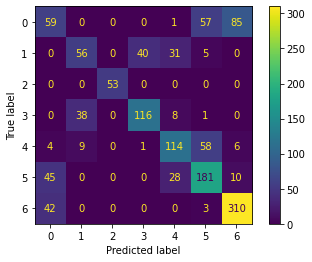

In [24]:
plot_confusion_matrix(poly, X_test, y_test)

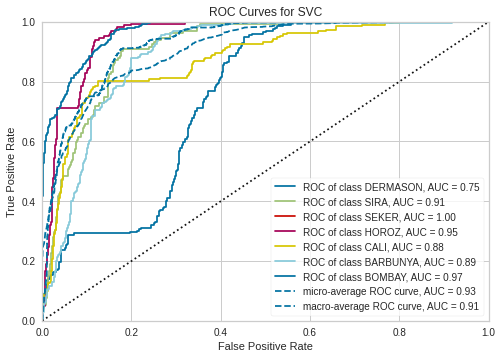

0.9068146505556269

In [25]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(poly, classes=["DERMASON", "SIRA", "SEKER", "HOROZ", "CALI", "BARBUNYA", "BOMBAY"])

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [26]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print (classification_report(y_test,rbf_pred))
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00       163
           4       1.00      0.06      0.12       192
           5       0.00      0.00      0.00       264
           6       0.26      1.00      0.42       355

    accuracy                           0.27      1361
   macro avg       0.18      0.15      0.08      1361
weighted avg       0.21      0.27      0.13      1361

Accuracy (RBF Kernel):  26.97


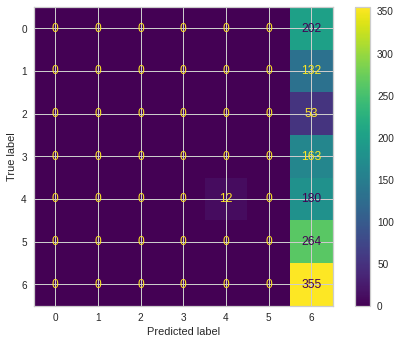

In [27]:
plot_confusion_matrix(rbf, X_test, y_test)

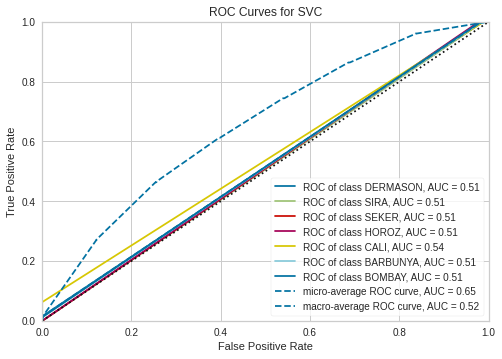

0.5150004079327102

In [28]:
visualizer = ROCAUC(rbf, classes=["DERMASON", "SIRA", "SEKER", "HOROZ", "CALI", "BARBUNYA", "BOMBAY"])

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [29]:
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print (classification_report(y_test,linear_pred))
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       202
           1       0.99      0.86      0.92       132
           2       1.00      1.00      1.00        53
           3       0.90      0.97      0.93       163
           4       0.96      0.95      0.96       192
           5       0.88      0.90      0.89       264
           6       0.93      0.93      0.93       355

    accuracy                           0.93      1361
   macro avg       0.95      0.94      0.94      1361
weighted avg       0.94      0.93      0.93      1361

Accuracy (Linear Kernel):  93.39


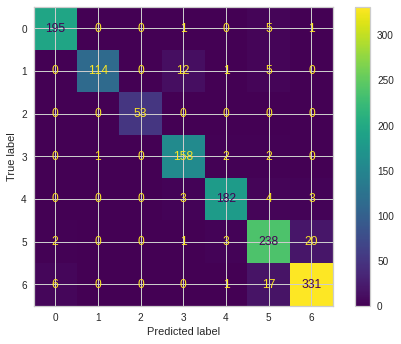

In [30]:
plot_confusion_matrix(linear, X_test, y_test)

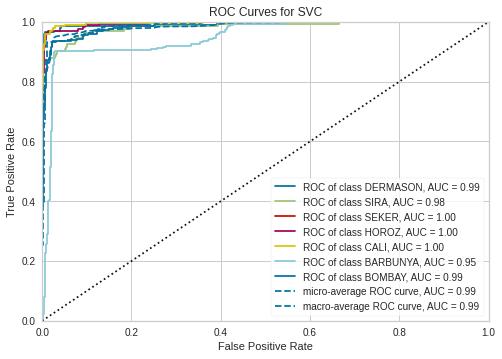

0.9866145304241144

In [31]:
visualizer = ROCAUC(linear, classes=["DERMASON", "SIRA", "SEKER", "HOROZ", "CALI", "BARBUNYA", "BOMBAY"])

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

 **NB**

In [32]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print (classification_report(y_test,predicted))
clf_accuracy = accuracy_score(y_test, predicted)
print('Accuracy (NB): ', "%.2f" % (clf_accuracy*100))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       202
           1       0.65      0.59      0.62       132
           2       1.00      1.00      1.00        53
           3       0.79      0.79      0.79       163
           4       0.83      0.77      0.80       192
           5       0.72      0.83      0.77       264
           6       0.87      0.85      0.86       355

    accuracy                           0.80      1361
   macro avg       0.81      0.80      0.80      1361
weighted avg       0.80      0.80      0.80      1361

Accuracy (NB):  79.57


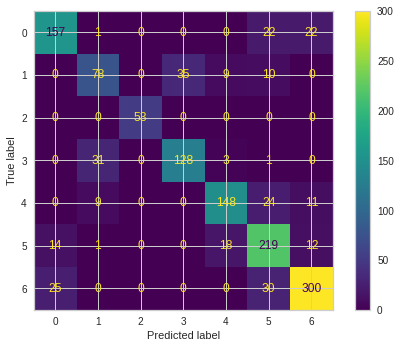

In [33]:
plot_confusion_matrix(clf, X_test, y_test)

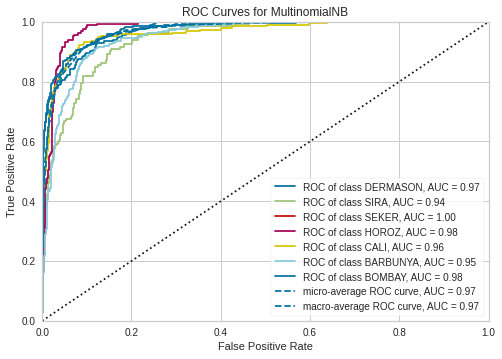

0.9699127706309966

In [34]:
visualizer = ROCAUC(clf, classes=["DERMASON", "SIRA", "SEKER", "HOROZ", "CALI", "BARBUNYA", "BOMBAY"])

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [35]:
#KNN
Knn = KNeighborsClassifier()
#treinando o modelo
Knn.fit(X_train, y_train)

#predição
y_pred = Knn.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (KNN): ', "%.2f" % (knn_accuracy*100))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       202
           1       0.48      0.46      0.47       132
           2       1.00      1.00      1.00        53
           3       0.66      0.64      0.65       163
           4       0.70      0.66      0.68       192
           5       0.71      0.77      0.74       264
           6       0.85      0.89      0.87       355

    accuracy                           0.74      1361
   macro avg       0.74      0.73      0.74      1361
weighted avg       0.74      0.74      0.74      1361

Accuracy (KNN):  73.99


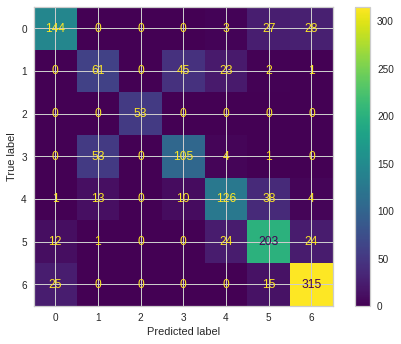

In [36]:
#Matriz de Confusão KNN
plot_confusion_matrix(Knn, X_test, y_test)

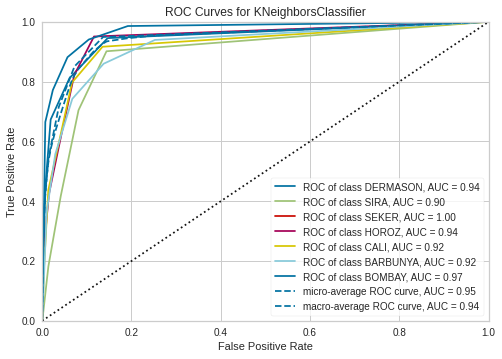

0.9424817638183576

In [37]:
# Curva ROC KNN
visualizer = ROCAUC(Knn, classes=["DERMASON", "SIRA", "SEKER", "HOROZ", "CALI", "BARBUNYA", "BOMBAY"])

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

**DECISION TREE** 

In [38]:
#Arvore de Decisão
DT = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=30, criterion='entropy')
#treinando o modelo
DT.fit(X_train, y_train)

#predição
y_pred = DT.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (DT): ', "%.2f" % (dt_accuracy*100))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       202
           1       0.94      0.68      0.79       132
           2       1.00      1.00      1.00        53
           3       0.80      0.93      0.86       163
           4       0.95      0.95      0.95       192
           5       0.87      0.86      0.87       264
           6       0.90      0.93      0.92       355

    accuracy                           0.90      1361
   macro avg       0.92      0.90      0.90      1361
weighted avg       0.90      0.90      0.90      1361

Accuracy (DT):  90.15


[Text(0.5258620689655172, 0.9166666666666666, 'MajorAxisLength <= 328.433\nentropy = 2.647\nsamples = 12250\nvalue = [1825, 1190, 469, 1467, 1736, 2372, 3191]\nclass = BOMBAY'),
 Text(0.27586206896551724, 0.75, 'MinorAxisLength <= 181.618\nentropy = 1.75\nsamples = 7456\nvalue = [1822, 120, 0, 6, 138, 2179, 3191]\nclass = BOMBAY'),
 Text(0.13793103448275862, 0.5833333333333334, 'Perimeter <= 704.897\nentropy = 0.767\nsamples = 3354\nvalue = [15, 1, 0, 0, 126, 367, 2845]\nclass = BOMBAY'),
 Text(0.06896551724137931, 0.4166666666666667, 'Perimeter <= 668.069\nentropy = 0.175\nsamples = 2441\nvalue = [14, 0, 0, 0, 5, 33, 2389]\nclass = BOMBAY'),
 Text(0.034482758620689655, 0.25, 'MinorAxisLength <= 171.186\nentropy = 0.048\nsamples = 1670\nvalue = [9, 0, 0, 0, 0, 0, 1661]\nclass = BOMBAY'),
 Text(0.017241379310344827, 0.08333333333333333, 'entropy = 0.0\nsamples = 1595\nvalue = [0, 0, 0, 0, 0, 0, 1595]\nclass = BOMBAY'),
 Text(0.05172413793103448, 0.08333333333333333, 'entropy = 0.529\nsa

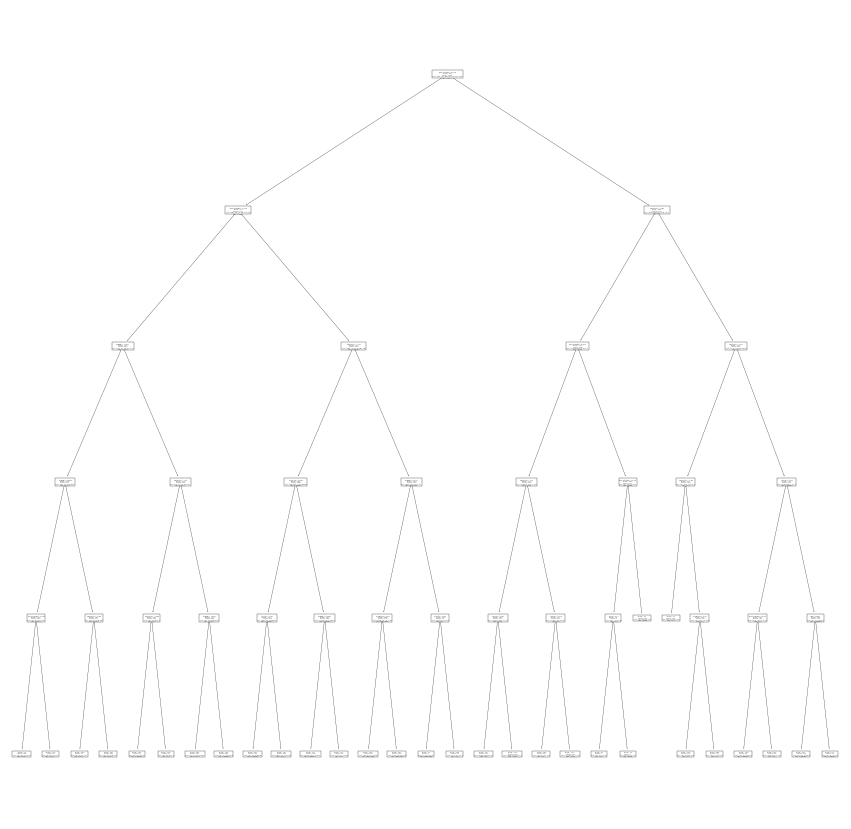

In [39]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
plt.figure(figsize=(15,15))
plot_tree(DT, feature_names=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'], class_names=['DERMASON','SIRA' ,'SEKER','HOROZ', 'CALI','BARBUNYA','BOMBAY'])

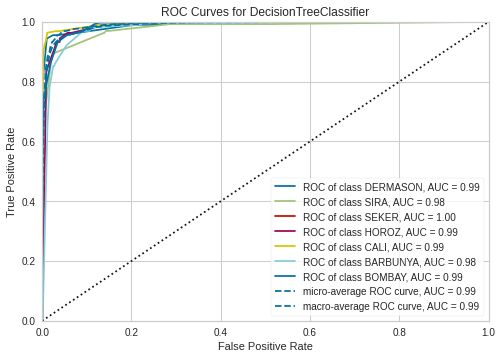

0.9891058728956379

In [40]:
# Curva ROC Arvore de decisão
visualizer = ROCAUC(DT, classes=["DERMASON", "SIRA", "SEKER", "HOROZ", "CALI", "BARBUNYA", "BOMBAY"])

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [41]:
#MLPClassifier
MLP = MLPClassifier()
#treinando o modelo
MLP.fit(X_train, y_train)

#predição
y_pred = MLP.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
mlp_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (MLP): ', "%.2f" % (mlp_accuracy*100))

              precision    recall  f1-score   support

           0       0.41      0.97      0.58       202
           1       0.25      0.02      0.04       132
           2       1.00      1.00      1.00        53
           3       0.35      0.99      0.52       163
           4       1.00      0.01      0.02       192
           5       0.00      0.00      0.00       264
           6       0.83      0.85      0.84       355

    accuracy                           0.52      1361
   macro avg       0.55      0.55      0.43      1361
weighted avg       0.52      0.52      0.41      1361

Accuracy (MLP):  52.46


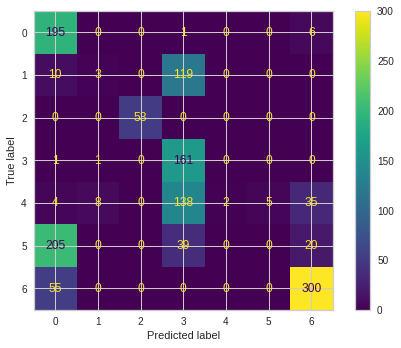

In [42]:
from sklearn import metrics
plot_confusion_matrix(MLP, X_test, y_test)

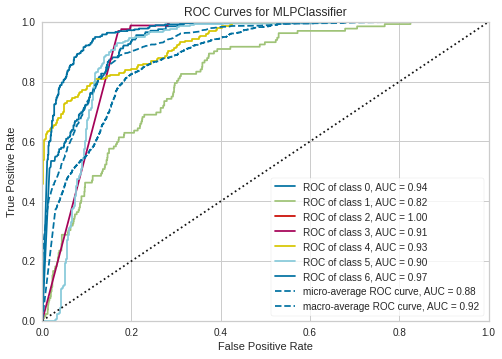

0.9242423571873836

In [43]:
# Curva ROC MLPClassifier
visualizer = ROCAUC(MLP)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

# **CROSS VALIDATION**

In [44]:
  DT = DecisionTreeClassifier()
  Knn = KNeighborsClassifier ()
  NB = MultinomialNB()
  SVM = svm.SVC()
  MLP = MLPClassifier()
  

  # kfold
  DT_result = cross_val_score(DT, X, y, cv = skf)
  Knn_result = cross_val_score(Knn, X, y, cv = skf)
  NB_result = cross_val_score(NB, X, y, cv = skf)
  SVM_result = cross_val_score(SVM, X, y, cv = skf)
  MLP_result = cross_val_score(MLP, X, y, cv = skf)

  
  # dicionário dos modelos
  dic_models = {
    "Decision Tree": DT_result.mean(),
    "KNN": Knn_result.mean(),
    "NB": NB_result.mean(),
    "SVM": SVM_result.mean(),
    "MLP": MLP_result.mean()
  }
  # Select the best model.
  bestModel = max(dic_models, key=dic_models.get)

  print("Decision Tree média : {0}\nKnn média : {1}\nNB média : {2} \nSVM média : {3} \nMLP média : {4}".format(DT_result.mean(), Knn_result.mean(), NB_result.mean(), SVM_result.mean(), MLP_result.mean()))
  print("Melhor modelo: {0} valor: {1}".format(bestModel, dic_models[bestModel]))

Decision Tree média : 0.8928066949994659
Knn média : 0.732421796187264
NB média : 0.7829700024060222 
SVM média : 0.6347067620012494 
MLP média : 0.5206134061829376
Melhor modelo: Decision Tree valor: 0.8928066949994659


# **SELEÇÃO DE ATRIBUTOS**

Limiar da variância


In [45]:
from sklearn.feature_selection import VarianceThreshold

filter_variance = VarianceThreshold(0.8)
X_filtered = filter_variance.fit_transform(X)

# quantas features conseguimos remover?
print("Features selecionadas: %d" %(X_filtered.shape[1]))

Features selecionadas: 6


In [46]:
df1 = pd.DataFrame(X_filtered, columns = ['Area','Perimeter','MajorAxisLenght','MinorAxisLenght','ConvexArea','EquivDiameter' ])

In [47]:
skf  = StratifiedKFold(n_splits=10, shuffle=True)

for train, test in skf.split(df1, y):
  X_train, X_test = df1.iloc[train], df1.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]


# **RETREINAR TODOS OS MODELOS** 

In [48]:
X_train

Area  Perimeter  MajorAxisLenght  MinorAxisLenght  ConvexArea  \
0      28395.0    610.291       208.178117       173.888747     28715.0   
1      28734.0    638.018       200.524796       182.734419     29172.0   
2      29380.0    624.110       212.826130       175.931143     29690.0   
4      30140.0    620.134       201.847882       190.279279     30417.0   
5      30279.0    634.927       212.560556       181.510182     30600.0   
...        ...        ...              ...              ...         ...   
13604  42070.0    763.489       289.022373       186.123434     42556.0   
13605  42070.0    760.701       276.691651       193.945366     42458.0   
13606  42097.0    759.696       288.721612       185.944705     42508.0   
13607  42101.0    757.499       281.576392       190.713136     42494.0   
13609  42147.0    763.779       283.382636       190.275731     42667.0   

       EquivDiameter  
0         190.141097  
1         191.272750  
2         193.410904  
4         195.896503  
5         196.347702  
...              ...  
13604     231.441543  
13605     231.441543  
13606     231.515799  
13607     231.526798  
13609     231.653248  

[12250 rows x 6 columns]

SVM

In [49]:
svc = SVC(gamma=1)
rbf = svm.SVC(kernel='rbf', gamma=0.8, C=100).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=100).fit(X_train, y_train)
linear = svm.SVC(kernel = 'linear').fit(X_train, y_train)

In [50]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
linear_pred = linear.predict(X_test)

In [51]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print (classification_report(y_test,poly_pred))
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))


              precision    recall  f1-score   support

           0       0.45      0.37      0.40       202
           1       0.58      0.48      0.53       132
           2       1.00      1.00      1.00        53
           3       0.72      0.75      0.73       163
           4       0.74      0.63      0.68       192
           5       0.63      0.73      0.67       264
           6       0.78      0.86      0.82       355

    accuracy                           0.68      1361
   macro avg       0.70      0.69      0.69      1361
weighted avg       0.68      0.68      0.68      1361

Accuracy (Polynomial Kernel):  68.48


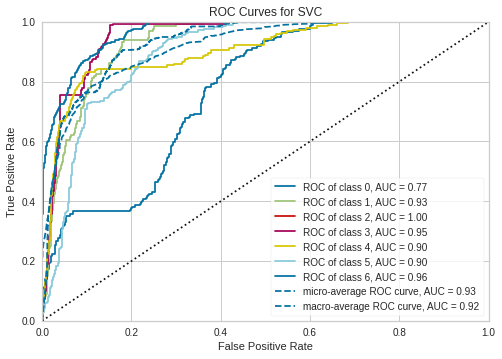

0.9171999323934309

In [52]:
visualizer = ROCAUC(poly)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [53]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print (classification_report(y_test,rbf_pred))
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00       163
           4       1.00      0.05      0.10       192
           5       0.00      0.00      0.00       264
           6       0.26      1.00      0.42       355

    accuracy                           0.27      1361
   macro avg       0.18      0.15      0.07      1361
weighted avg       0.21      0.27      0.12      1361

Accuracy (RBF Kernel):  26.82


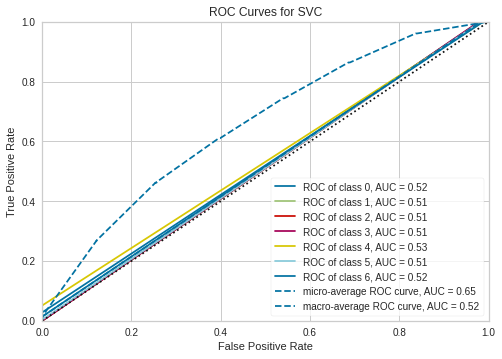

0.5157573896220207

In [54]:
visualizer = ROCAUC(rbf)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [55]:
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print (classification_report(y_test,linear_pred))
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       202
           1       0.94      0.90      0.92       132
           2       1.00      1.00      1.00        53
           3       0.93      0.98      0.95       163
           4       0.95      0.95      0.95       192
           5       0.86      0.84      0.85       264
           6       0.91      0.92      0.91       355

    accuracy                           0.92      1361
   macro avg       0.93      0.93      0.93      1361
weighted avg       0.92      0.92      0.92      1361

Accuracy (Linear Kernel):  92.06


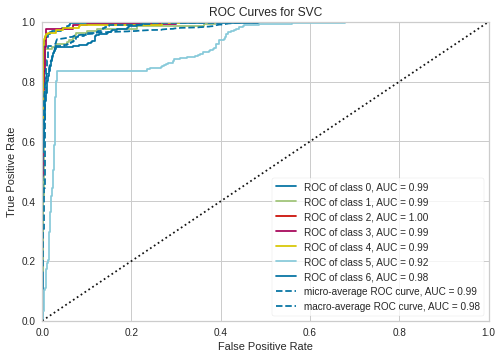

0.9825811030658752

In [56]:
visualizer = ROCAUC(linear)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

NB

In [57]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print (classification_report(y_test,predicted))
print('Accuracy (Linear Kernel): ', "%.2f" % (accuracy_score(y_test, predicted)*100))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       202
           1       0.64      0.59      0.62       132
           2       1.00      1.00      1.00        53
           3       0.74      0.80      0.77       163
           4       0.88      0.81      0.84       192
           5       0.73      0.80      0.77       264
           6       0.86      0.84      0.85       355

    accuracy                           0.79      1361
   macro avg       0.80      0.80      0.80      1361
weighted avg       0.80      0.79      0.79      1361

Accuracy (Linear Kernel):  79.35


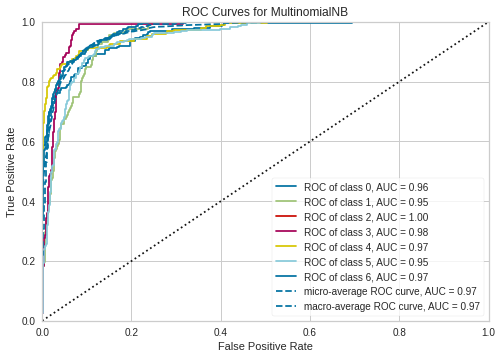

0.9686839334334381

In [58]:
visualizer = ROCAUC(clf)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

KNN

In [59]:
#KNN
Knn = KNeighborsClassifier()
#treinando o modelo
Knn.fit(X_train, y_train)

#predição
y_pred = Knn.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', "%.2f" % (knn_accuracy*100))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       202
           1       0.51      0.51      0.51       132
           2       1.00      1.00      1.00        53
           3       0.66      0.71      0.68       163
           4       0.76      0.72      0.74       192
           5       0.69      0.73      0.71       264
           6       0.84      0.86      0.85       355

    accuracy                           0.75      1361
   macro avg       0.75      0.75      0.75      1361
weighted avg       0.75      0.75      0.75      1361

Accuracy:  74.50


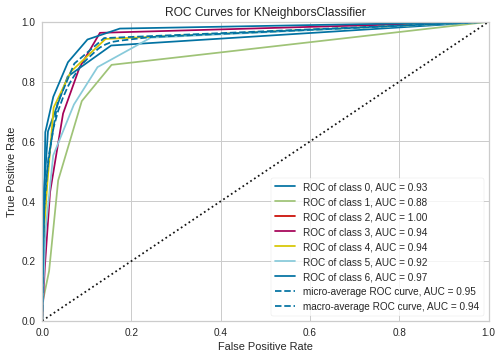

0.9415279770972101

In [60]:
visualizer = ROCAUC(Knn)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [61]:
#Arvore de Decisão
DT = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=30, criterion='entropy')
#treinando o modelo
DT.fit(X_train, y_train)

#predição
y_pred = DT.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', "%.2f" % (dt_accuracy*100))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       202
           1       0.79      0.58      0.67       132
           2       1.00      1.00      1.00        53
           3       0.71      0.88      0.79       163
           4       0.98      0.94      0.96       192
           5       0.87      0.75      0.81       264
           6       0.87      0.93      0.90       355

    accuracy                           0.87      1361
   macro avg       0.88      0.87      0.87      1361
weighted avg       0.87      0.87      0.86      1361

Accuracy:  86.63


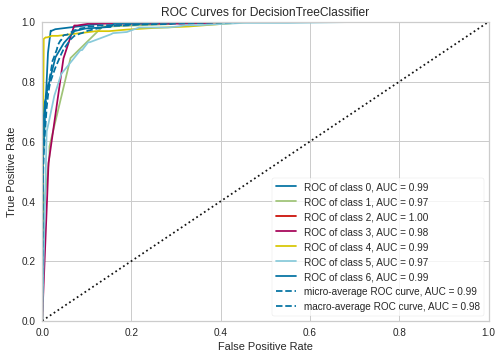

0.9835394614988718

In [62]:
visualizer = ROCAUC(DT)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [63]:
#MLPClassifier
MLP = MLPClassifier()
#treinando o modelo
MLP.fit(X_train, y_train)

#predição
y_pred = MLP.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
mlp_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', "%.2f" % (mlp_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.00      0.00      0.00       132
           2       1.00      1.00      1.00        53
           3       1.00      0.01      0.02       163
           4       0.19      1.00      0.32       192
           5       0.00      0.00      0.00       264
           6       0.74      0.64      0.68       355

    accuracy                           0.35      1361
   macro avg       0.42      0.38      0.29      1361
weighted avg       0.38      0.35      0.27      1361

Accuracy:  34.75


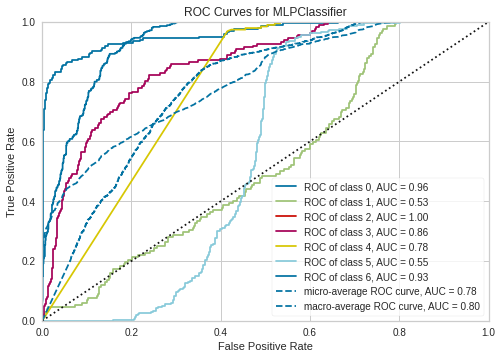

0.8030509746915304

In [64]:
visualizer = ROCAUC(MLP)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

CROSS VALIDATION

In [66]:
  DT = DecisionTreeClassifier()
  Knn = KNeighborsClassifier ()
  NB = MultinomialNB()
  SVM = svm.SVC()
  MLP = MLPClassifier()
  

  # kfold
  DT_result = cross_val_score(DT, X_filtered, y, cv = skf)
  Knn_result = cross_val_score(Knn, X_filtered, y, cv = skf)
  NB_result = cross_val_score(NB, X_filtered, y, cv = skf)
  SVM_result = cross_val_score(SVM, X_filtered, y, cv = skf)
  MLP_result = cross_val_score(MLP, X_filtered, y, cv = skf)

  
  # dicionário dos modelos
  dic_models = {
    "Decision Tree": DT_result.mean(),
    "KNN": Knn_result.mean(),
    "NB": NB_result.mean(),
    "SVM": SVM_result.mean(),
    "MLP": MLP_result.mean()
  }
  # Select the best model.
  bestModel = max(dic_models, key=dic_models.get)

  print("Decision Tree média : {0}\nKnn média : {1}\nNB média : {2} \nSVM média : {3} \nMLP média : {4}".format(DT_result.mean(), Knn_result.mean(), NB_result.mean(), SVM_result.mean(), MLP_result.mean()))
  print("Melhor modelo: {0} valor: {1}".format(bestModel, dic_models[bestModel]))

Decision Tree média : 0.8740715505680047
Knn média : 0.7316848844623836
NB média : 0.7833378109082355 
SVM média : 0.634413399925122 
MLP média : 0.4749856232082957
Melhor modelo: Decision Tree valor: 0.8740715505680047


#**SELEÇÃO DE INSTÂNCIAS**
ENN



In [71]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X, y)

In [72]:
for train, test in skf.split(X_res, y_res):
    print("train size:",len(train), "test size:",len(test))

train size: 6049 test size: 673
train size: 6049 test size: 673
train size: 6050 test size: 672
train size: 6050 test size: 672
train size: 6050 test size: 672
train size: 6050 test size: 672
train size: 6050 test size: 672
train size: 6050 test size: 672
train size: 6050 test size: 672
train size: 6050 test size: 672


SVM

In [73]:
 svc = SVC(gamma=1)
rbf = svm.SVC(kernel='rbf', gamma=0.8, C=100).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=100).fit(X_train, y_train)
linear = svm.SVC(kernel = 'linear').fit(X_train, y_train)

In [74]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
linear_pred = linear.predict(X_test)

In [75]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print (classification_report(y_test,poly_pred))
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))


              precision    recall  f1-score   support

           0       0.45      0.37      0.40       202
           1       0.58      0.48      0.53       132
           2       1.00      1.00      1.00        53
           3       0.72      0.75      0.73       163
           4       0.74      0.63      0.68       192
           5       0.63      0.73      0.67       264
           6       0.78      0.86      0.82       355

    accuracy                           0.68      1361
   macro avg       0.70      0.69      0.69      1361
weighted avg       0.68      0.68      0.68      1361

Accuracy (Polynomial Kernel):  68.48


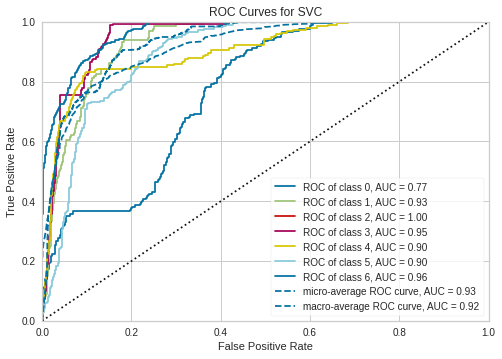

0.9171999323934309

In [76]:
visualizer = ROCAUC(poly)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [77]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print (classification_report(y_test,rbf_pred))
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00       163
           4       1.00      0.05      0.10       192
           5       0.00      0.00      0.00       264
           6       0.26      1.00      0.42       355

    accuracy                           0.27      1361
   macro avg       0.18      0.15      0.07      1361
weighted avg       0.21      0.27      0.12      1361

Accuracy (RBF Kernel):  26.82


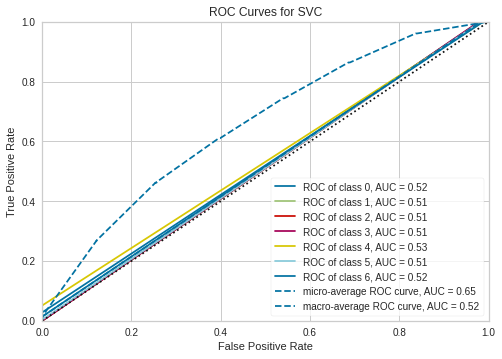

0.5157573896220207

In [78]:
visualizer = ROCAUC(rbf)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [79]:
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print (classification_report(y_test,linear_pred))
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       202
           1       0.94      0.90      0.92       132
           2       1.00      1.00      1.00        53
           3       0.93      0.98      0.95       163
           4       0.95      0.95      0.95       192
           5       0.86      0.84      0.85       264
           6       0.91      0.92      0.91       355

    accuracy                           0.92      1361
   macro avg       0.93      0.93      0.93      1361
weighted avg       0.92      0.92      0.92      1361

Accuracy (Linear Kernel):  92.06


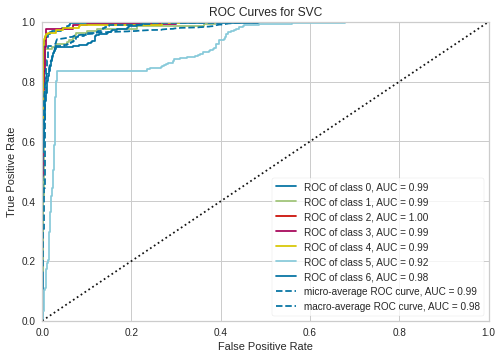

0.9825811030658752

In [80]:
visualizer = ROCAUC(linear)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

NB

In [81]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print (classification_report(y_test,predicted))
print('Accuracy (Linear Kernel): ', "%.2f" % (accuracy_score(y_test, predicted)*100))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       202
           1       0.64      0.59      0.62       132
           2       1.00      1.00      1.00        53
           3       0.74      0.80      0.77       163
           4       0.88      0.81      0.84       192
           5       0.73      0.80      0.77       264
           6       0.86      0.84      0.85       355

    accuracy                           0.79      1361
   macro avg       0.80      0.80      0.80      1361
weighted avg       0.80      0.79      0.79      1361

Accuracy (Linear Kernel):  79.35


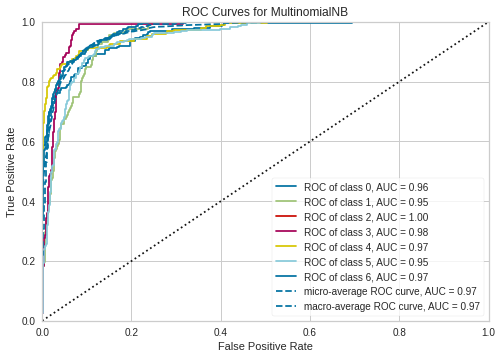

0.9686839334334381

In [82]:
visualizer = ROCAUC(clf)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [83]:
#KNN
Knn = KNeighborsClassifier()
#treinando o modelo
Knn.fit(X_train, y_train)

#predição
y_pred = Knn.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
print('Accuracy (KNN): ', "%.2f" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       202
           1       0.51      0.51      0.51       132
           2       1.00      1.00      1.00        53
           3       0.66      0.71      0.68       163
           4       0.76      0.72      0.74       192
           5       0.69      0.73      0.71       264
           6       0.84      0.86      0.85       355

    accuracy                           0.75      1361
   macro avg       0.75      0.75      0.75      1361
weighted avg       0.75      0.75      0.75      1361

Accuracy (KNN):  74.50


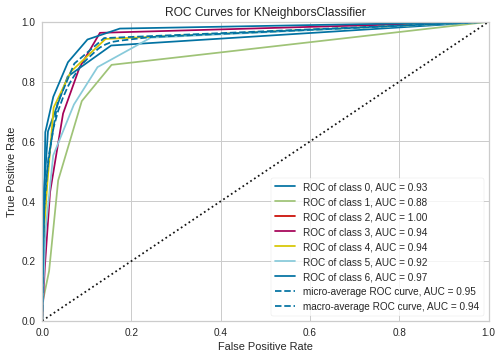

0.9415279770972101

In [84]:
visualizer = ROCAUC(Knn)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [97]:
#Arvore de Decisão
DT = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=30, criterion='entropy')
#treinando o modelo
DT.fit(X_train, y_train)

#predição
y_pred = DT.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
print('Accuracy (DT): ', "%.2f" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       202
           1       0.79      0.58      0.67       132
           2       1.00      1.00      1.00        53
           3       0.71      0.88      0.79       163
           4       0.98      0.94      0.96       192
           5       0.87      0.75      0.81       264
           6       0.87      0.93      0.90       355

    accuracy                           0.87      1361
   macro avg       0.88      0.87      0.87      1361
weighted avg       0.87      0.87      0.86      1361

Accuracy (DT):  86.63


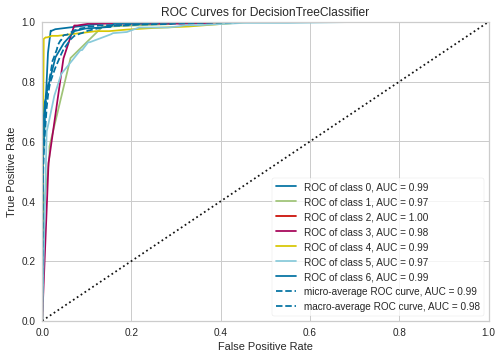

0.9835394614988718

In [98]:
visualizer = ROCAUC(DT)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

In [111]:
#MLPClassifier
MLP = MLPClassifier(shuffle=False)
#treinando o modelo
MLP.fit(X_train, y_train)

#predição
y_pred = MLP.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))
print('Accuracy (MLP): ', "%.2f" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00       163
           4       0.00      0.00      0.00       192
           5       0.00      0.00      0.00       264
           6       0.26      1.00      0.41       355

    accuracy                           0.26      1361
   macro avg       0.04      0.14      0.06      1361
weighted avg       0.07      0.26      0.11      1361

Accuracy (MLP):  26.08


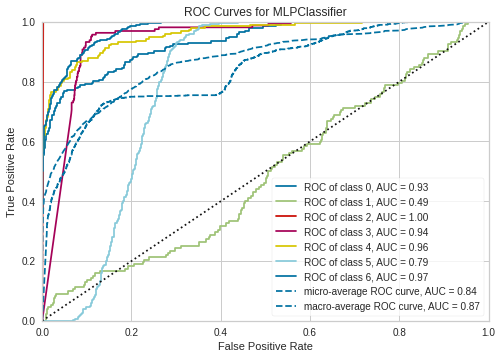

0.8707916106944192

In [92]:
visualizer = ROCAUC(MLP)

visualizer.fit(X_train, y_train)        # Ajustar os dados de treinamento ao visualizador
visualizer.score(X_test, y_test)        # Avalie o modelo nos dados de teste
visualizer.show()                       # Finalize e renderize a figura 
visualizer.score_

CROSS VALIDATION

In [89]:
  DT = DecisionTreeClassifier()
  Knn = KNeighborsClassifier ()
  NB = MultinomialNB()
  SVM = svm.SVC()
  MLP = MLPClassifier()
  

  # kfold
  DT_result = cross_val_score(DT, X_filtered, y, cv = skf)
  Knn_result = cross_val_score(Knn, X_filtered, y, cv = skf)
  NB_result = cross_val_score(NB, X_filtered, y, cv = skf)
  SVM_result = cross_val_score(SVM, X_filtered, y, cv = skf)
  MLP_result = cross_val_score(MLP, X_filtered, y, cv = skf)

  
  # dicionário dos modelos
  dic_models = {
    "Decision Tree": DT_result.mean(),
    "KNN": Knn_result.mean(),
    "NB": NB_result.mean(),
    "SVM": SVM_result.mean(),
    "MLP": MLP_result.mean()
  }
  # Select the best model.
  bestModel = max(dic_models, key=dic_models.get)

  print("Decision Tree média : {0}\nKnn média : {1}\nNB média : {2} \nSVM média : {3} \nMLP média : {4}".format(DT_result.mean(), Knn_result.mean(), NB_result.mean(), SVM_result.mean(), MLP_result.mean()))
  print("The best model is: {0} with value: {1}".format(bestModel, dic_models[bestModel]))

Decision Tree média : 0.8806118848864044
Knn média : 0.7319076842737859
NB média : 0.7837035694363974 
SVM média : 0.6361770789164484 
MLP média : 0.4759443637042383
The best model is: Decision Tree with value: 0.8806118848864044
